<h1 align=center><font size = 5>Visualizing Immigration Trends to Canada with Pie Charts, Box Plots, Scatter Plots, and Bubble Plots</font></h1>

## Objectives

* Use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013. 
* Create a box plot that shows Japanese immigration between 1980 - 2013.
* Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.
* Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.
* Create a scatter plot, to visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013
* Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013.
* Create bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013.
* Compare immigration from China and India with a bubble plot to visualize any differences with time from 1980 to 2013.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">About the Data</a></li>
        <li><a href="#ref2">Downloading and Prepping Data</a></li>
        <li><a href="#ref3">Pie Charts</a></li>
        <li><a href="#ref4">Box Plots</a></li>
        <li><a href="#ref5">Scatter Plots</a></li>
        <li><a href="#ref6">Bubble Plots</a></li>
    </ol>
</div>

<a id="ref1"></a> 
# About the Data

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml) from United Nation's website.

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals.

<a id="ref2"></a> 
# Downloading and Prepping Data

In [1]:
import numpy as np  
import pandas as pd 

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print(df_can.shape)

(195, 43)


In [5]:
# Removing unnecessary columns 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# renaming the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, making all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# setting the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# adding total column
df_can['Total'] = df_can.sum(axis=1)

# years that will be used
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<a id="ref3"></a> 
# Pie Charts 

#### Creating a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [7]:
# grouping countries by continents and applying sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Plotting the data
- `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
- `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

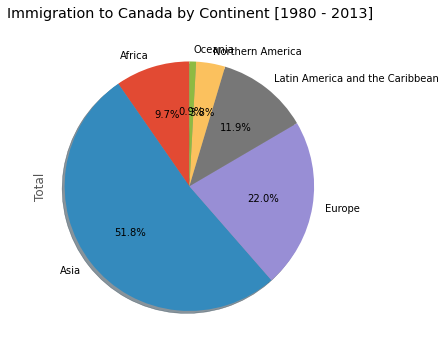

In [8]:
# autopct creates %, start angle represents starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,            
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The following modifications will be used to improve the visuals:

* Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
* Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
* Pass in a custom set of colors for continents by passing in `colors` parameter.
* **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in `explode` parameter.


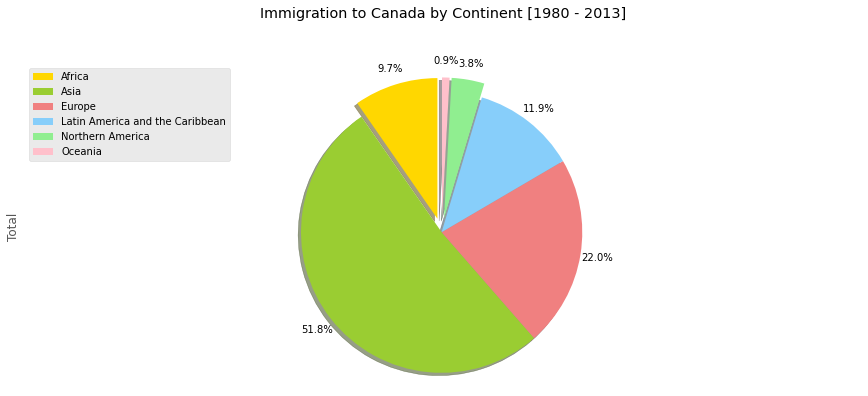

In [9]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

<a id="ref4"></a> 
# Box Plots

#### Plotting the box plot for the Japanese immigrants between 1980 - 2013.

Getting the dataset for Japan

In [11]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


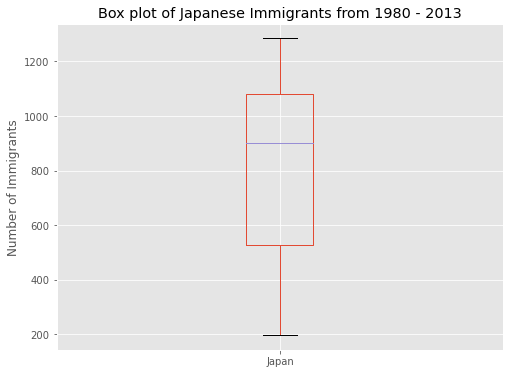

In [12]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [13]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


#### Comparing the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Getting the dataset for China and India

In [14]:
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [15]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


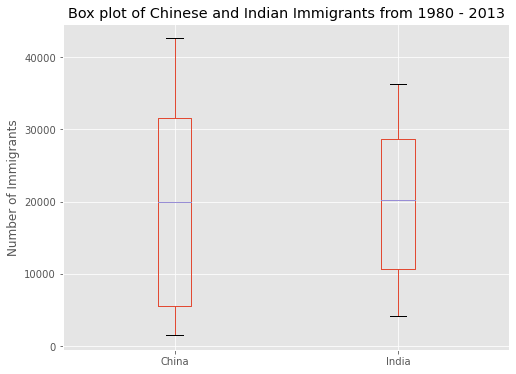

In [16]:
df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Chinese and Indian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

While both countries have around the same median immigrant population (~20,000),  China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

Changing the box plot to be horizontal instead.

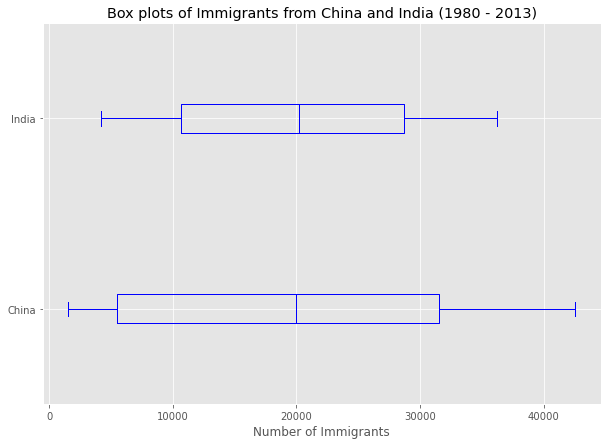

In [17]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Subplots**

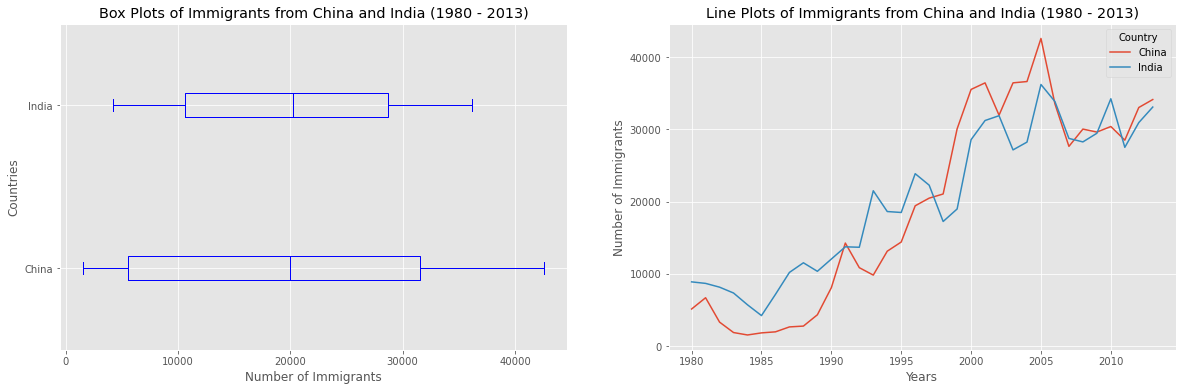

In [18]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

#### Creating a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

Getting the top 15 countries based on Total immigrant population.

In [19]:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


Creating a new dataframe which contains the aggregate for each decade:

In [20]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)


# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 



new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [21]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


Plotting the box plots.

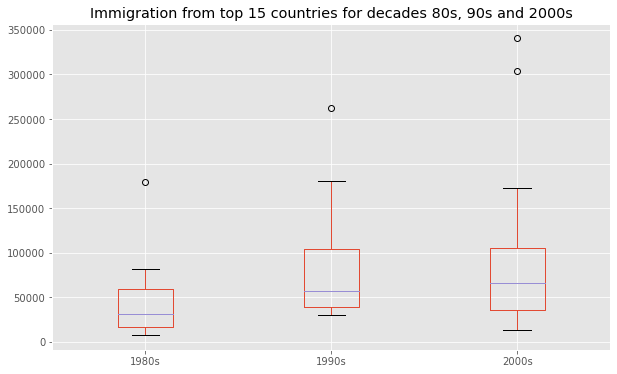

In [22]:
new_df.plot(kind='box', figsize=(10,6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

Note: the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>
* larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
* smaller than Q1 by at least 1.5 times the IQR.

Viewing the 2000s as an example: <br>
* Q1 (25%) = 36,101.5 <br>
* Q3 (75%) = 105,505.5 <br>
* IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404) <br>
Outlier > 209,611.5

In [23]:
# Checking how many entries fall above the outlier threshold 
new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


China and India are both considered as outliers since their population for the decade exceeds 209,611.5. 

<a id="ref5"></a> 
# Scatter Plots

#### Using a scatter plot, to visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Getting the dataset.

In [24]:
# using the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# changeing the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# resetting the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# renaming columns
df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Plotting the data.

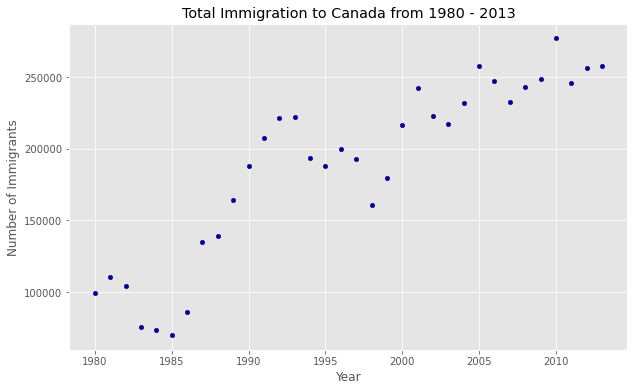

In [25]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Plotting a linear line of best fit, and using it to  predict the number of immigrants in 2015.

In [26]:
x = df_tot['year']      
y = df_tot['total']     
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

Plotting the regression line on the `scatter plot`.

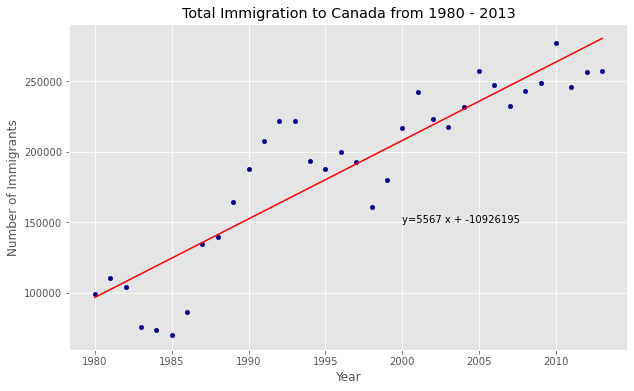

'No. Immigrants = 5567 * Year + -10926195'

In [27]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

#### Creating a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013.

In [28]:
# create dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Generating the scatter plot by plotting the total versus year in **df_total**.

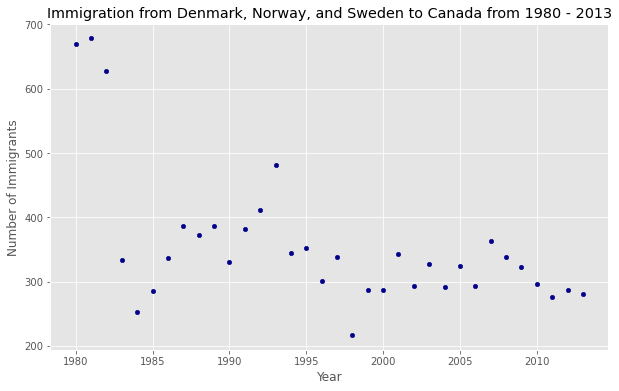

In [29]:
# generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()

<a id="ref6"></a> 
# Bubble Plots

#### Creating a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013

The weights for the bubbles will be set as the *normalized* value of the population for each year.

Getting the Data for Brazil & Argentina.

In [30]:
df_can_t = df_can[years].transpose() # transposed dataframe

# casting the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# labeleling the index.
df_can_t.index.name = 'Year'

# resetting the index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


Creating the normalized weights. 

In [31]:
# normalizing Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalizing Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Plotting the Data

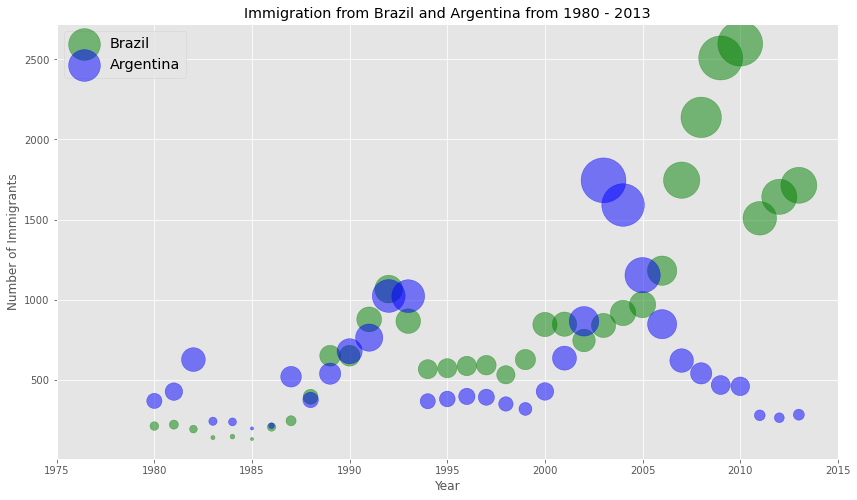

In [32]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

There is a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. A similar spike occurs around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression. 

On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

#### Creating bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. 

Normalizing the data pertaining to China and India.

In [33]:
# normalizing China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalizing India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

Generating the bubble plots.

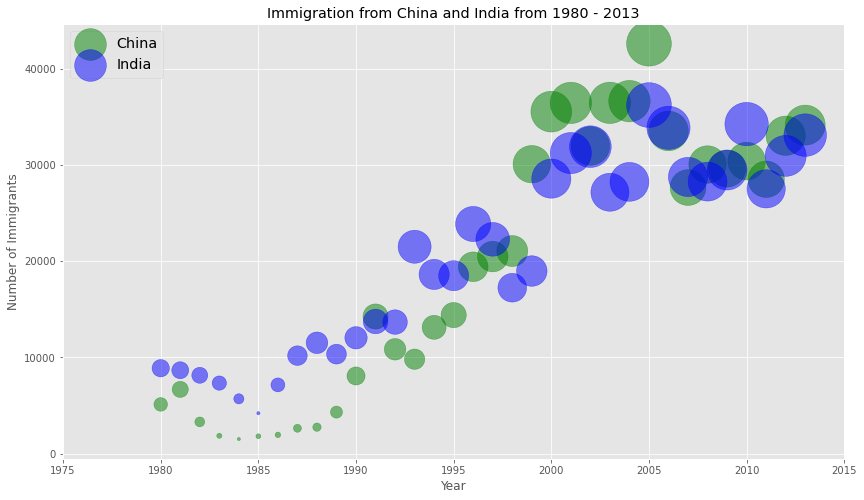

In [34]:
# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')